In [1]:
import pandas as pd

In [13]:
data=pd.read_csv("delivery_time.csv")

In [14]:
data.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# CORRELATION

In [16]:
data.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


C:\Users\anand\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DeliveryTime', ylabel='Density'>

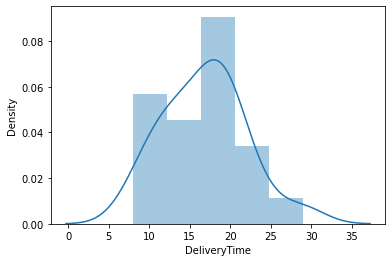

In [21]:
import seaborn as sns
sns.distplot(data['DeliveryTime'])

C:\Users\anand\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SortingTime', ylabel='Density'>

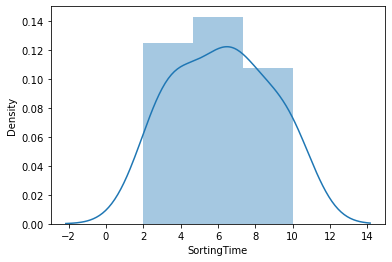

In [20]:
import seaborn as sns
sns.distplot(data['SortingTime'])

# Fitting a Linear Regression Model

In [19]:
import statsmodels.formula.api as smf
model = smf.ols("SortingTime~DeliveryTime",data = data).fit()

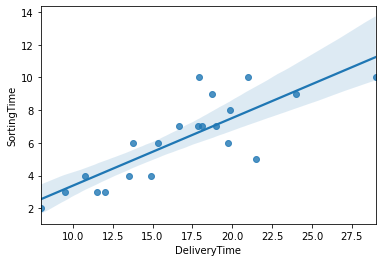

In [22]:
sns.regplot(x="DeliveryTime", y="SortingTime", data=data);

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SortingTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           3.98e-06
Time:                        19:47:41   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7567      1.134     -0.667      0.513      -3.130       1.617
DeliveryTime     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#Coefficients
model.params

Intercept      -0.756673
DeliveryTime    0.413744
dtype: float64

In [25]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)   

Intercept      -0.667290
DeliveryTime    6.387447
dtype: float64 
 Intercept       0.512611
DeliveryTime    0.000004
dtype: float64


In [26]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.682271474841723, 0.6655489208860242)

# Predict for new data point

In [27]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300])

In [28]:
data_pred=pd.DataFrame(newdata,columns=['DeliveryTime'])

In [29]:
model.predict(data_pred)

0     81.992052
1    123.366415
dtype: float64